ASSIGNMENT 11.1 | PREPARE A DATASET FOR LSTM AND CNN
--- | ---
Name: |  **Feliciano, Kurt**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Date Submitted: | **05-08-2024**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>


In [ ]:
from pandas import read_csv
import numpy as np
from datetime import datetime
from matplotlib import pyplot
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv',
                  header=0, parse_dates=[0], index_col=0, date_parser=parser)

<ipython-input-3-1589e73bc00d>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv',


In [ ]:
series.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [ ]:
series = series.dropna(axis=0)
series = series.drop(['Name'], axis=1)
series.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

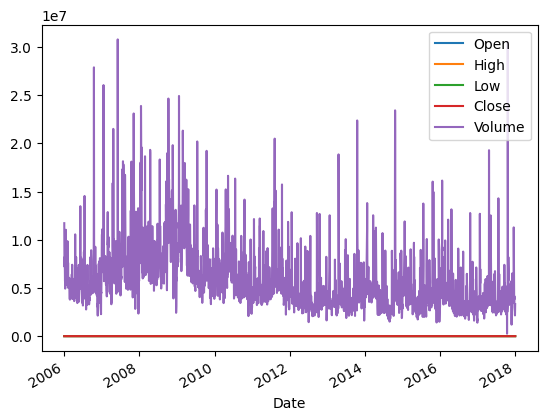

In [ ]:
series.plot()
pyplot.show()

In [ ]:
print(series)

              Open    High     Low   Close    Volume
Date                                                
2006-01-03   82.45   82.55   80.81   82.06  11715200
2006-01-04   82.20   82.50   81.33   81.95   9840600
2006-01-05   81.40   82.90   81.00   82.50   7213500
2006-01-06   83.95   85.03   83.41   84.95   8197400
2006-01-09   84.10   84.25   83.38   83.73   6858200
...            ...     ...     ...     ...       ...
2017-12-22  151.82  153.00  151.50  152.50   2990583
2017-12-26  152.51  153.86  152.50  152.83   2479017
2017-12-27  152.95  153.18  152.61  153.13   2149257
2017-12-28  153.20  154.12  153.20  154.04   2687624
2017-12-29  154.17  154.72  153.42  153.42   3327087

[3019 rows x 5 columns]


In [ ]:
train, test = train_test_split(series, train_size=0.917218543, shuffle=False)
train_scaler = MinMaxScaler()
train_scale = train_scaler.fit_transform(train)
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(train_scale[i-60:i,0])
    y_train.append(train_scale[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
85/85 [==============================] - 56s 29ms/step - loss: 0.0850
Epoch 2/10
85/85 [==============================] - 2s 26ms/step - loss: 0.0088
Epoch 3/10
85/85 [==============================] - 2s 25ms/step - loss: 0.0070
Epoch 4/10
85/85 [==============================] - 2s 25ms/step - loss: 0.0062
Epoch 5/10
85/85 [==============================] - 2s 27ms/step - loss: 0.0055
Epoch 6/10
85/85 [==============================] - 3s 34ms/step - loss: 0.0053
Epoch 7/10
85/85 [==============================] - 2s 24ms/step - loss: 0.0050
Epoch 8/10
85/85 [==============================] - 2s 24ms/step - loss: 0.0051
Epoch 9/10
85/85 [==============================] - 2s 24ms/step - loss: 0.0048
Epoch 10/10
85/85 [==============================] - 2s 24ms/step - loss: 0.0047


In [ ]:
test_scaler = MinMaxScaler()
test_scale = test_scaler.fit_transform(test)

X_test = []
for i in range(60,251):
    X_test.append(test_scale[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
prediction = model.predict(X_test)
prediction = np.repeat(prediction, 5, axis=1)
prediction = test_scaler.inverse_transform(prediction)
#print(prediction.shape)

6/6 [==============================] - 0s 23ms/step


<h2> <b> == CONCLUSION ==

To conclude this activity, I have learned how to prepare a dataset through similar means as to how we used to do it, with a few extra steps to be able to meet the requirements being needed in this specific task. I found it interesting that the split was high this time, as we were ordered to split the data in a specific way and had to divide the entries based on the date by the total number of entries, which resulted in 0.9172 as we can see in the code above. I also had to make a change in the parser, as the previous activities did not include the day in the %Y-%m-%d seen in that part of the code, and had to add it to make the csv work.